# MIDTERM CS370 

## PROBLEM SET 1: BAYESIAN LEARNING AND INFERENCE (TAKE HOME PROBLEM)

### PS1.1: Learning the bent coin experiment (15 points)

Consider a bent coin that has a probability of 0.7 of landing heads and a probability of 0.3 of landing tails. The coin is flipped m times. The sequence of heads and tails is recorded / observed and a hypothetical receiver needs to estimate the probability of heads from the experimental data.


####  PS1.1-1 (2.5 points)

What is the entropy in bits of the bent coin? Explain why its < 1 bits. 



The entropy in bits of the bent coin is found by using the formula H(X) = p(x1) log of base 2 (p(x1)) + p(x2) log of base 2 (p(x2)) and which results to 0.8813. 

The entropy in bit of the bent coin is less than 1 bits because of the bias nature of the coin, since probability of landing heads has higher probability(0.7) than that of probability of landing tails (0.3). The result of flipping this bent coin is more predictable which is landing head than the fair coin which result are uncertain because they have equal probabilities for head and tail. The maximum entropy of fair coin is 1 which indicates unpredictable. 

#### PS1.1-2 (2.5 points)

Plot the entropy of the sequence of heads and tails as m increases for m=1 to m=500 in steps of 50?

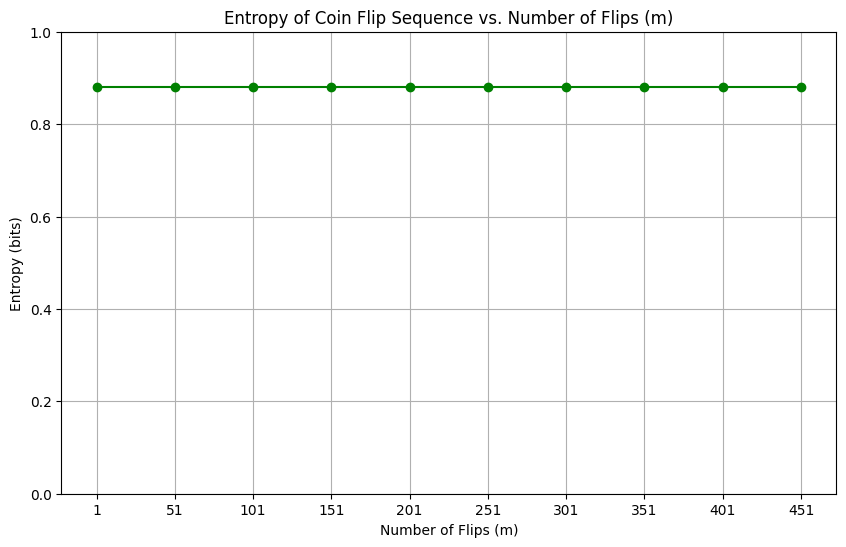

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import math

probabilityOfHead = 0.7
probabilityOfTail = 0.3

entropy = -(probabilityOfHead * math.log2(probabilityOfHead) +  probabilityOfTail * math.log2(probabilityOfTail))

m = np.arange(1,500,50)

entropyValue = np.full_like(m , fill_value = entropy, dtype = np.float64)

plt.figure(figsize=(10,6))
plt.plot(m , entropyValue, marker = 'o', linestyle='-', color ='green')
plt.title('Entropy of Coin Flip Sequence vs. Number of Flips (m)')
plt.xlabel('Number of Flips (m)')
plt.ylabel('Entropy (bits)')
plt.grid(True)
plt.xticks(m)
plt.ylim(0, 1)  
plt.show()




#### PS1.1-3 (10 points)
The receiver is given the sequence of heads and tails and must use the Bayes rule to estimate the probability of heads. As a parenthesis, if we know this parameter then we we can infer / predict the next binary event but this is not the focus here. 

The prior probability distribution is assumed to be beta and to solve this problem, you need to review the similar example presented in your AIMA textbook (Section 20.2.5) titled "Bayesian Parameter Learning". You are asked to estimate and plot the **mean of the posterior probability distribution** of the probability of heads as a function of the probability of heads given the sequence of heads and tails where m=[0,1, 2, 3, 4, 5, 10, 20, 50, 100]. 

You can use the scipy.stats library to help you out. To get full points you need to document extensively your code and explain the results. Note that you have to produce except from the 10 plots, a table with the mean and variance where the columns will be $m$, mean, var.




     m      Mean  Variance
0    0  0.500000  0.083333
1    1  0.333333  0.055556
2    2  0.500000  0.050000
3    3  0.400000  0.040000
4    4  0.500000  0.035714
5    5  0.428571  0.030612
6   10  0.500000  0.019231
7   20  0.500000  0.010870
8   50  0.500000  0.004717
9  100  0.500000  0.002427


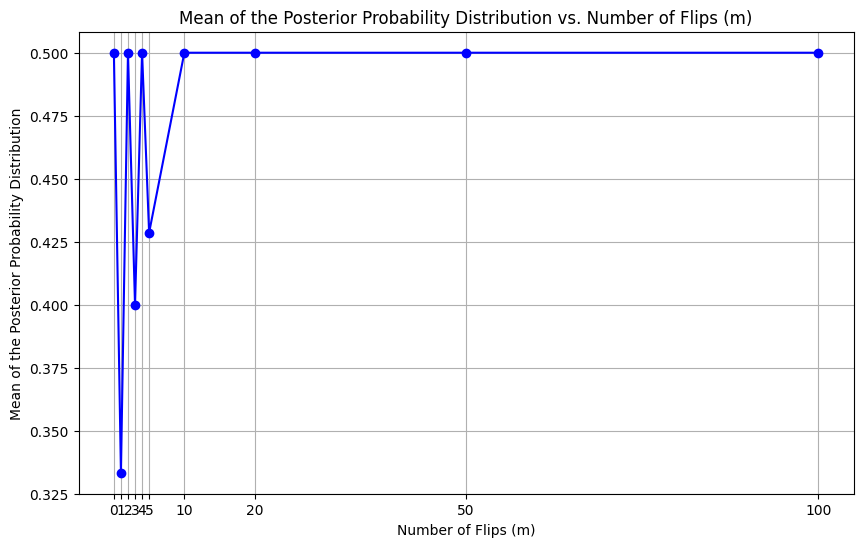

In [12]:
from scipy.stats import beta
import pandas as pd
import matplotlib.pyplot as plt

#Initial(prior) parameters for the Beta Distribution Beta(1,1), indicates that, initially, all probability of heads are equally likely.
alphaInitial = 1
betaInitial = 1

mValue = [0,1,2,3,4,5,10,20,50,100]

meanAndVariance = []

for m in mValue:
    # Hypothetical number of heads (assuming half of the flips are heads for simplicity)
    noOfHead = m // 2 
    
    #updating alpha and beta for the posterior Beta Distribution
    alphaPosterior = alphaInitial + noOfHead
    betaPosterior = betaInitial + (m - noOfHead)
    
    #mean of Posterior probability distribution of the probability of head 
    meanOfPosterior = alphaPosterior / (alphaPosterior + betaPosterior)
    #variance of Posterior probability distribution of the probability of head
    varianceOfPosterior = (alphaPosterior * betaPosterior) / ((alphaPosterior + betaPosterior)**2 *(alphaPosterior + betaPosterior + 1))
    
    #append the obtained mean and variance 
    meanAndVariance.append((m, meanOfPosterior, varianceOfPosterior))
    
#creating a DataFrame for tabulation

meanVarianceDataFrame = pd.DataFrame(meanAndVariance, columns =['m', 'Mean', 'Variance'])

#Displaying DataFrame which is tabular form of m ,mean and variance
print(meanVarianceDataFrame)

#plotting for mean of posterior probability 
plt.figure(figsize=(10, 6))
plt.plot(meanVarianceDataFrame['m'], meanVarianceDataFrame['Mean'], marker='o', linestyle='-', color='blue')
plt.title('Mean of the Posterior Probability Distribution vs. Number of Flips (m)')
plt.xlabel('Number of Flips (m)')
plt.ylabel('Mean of the Posterior Probability Distribution')
plt.grid(True)
plt.xticks(meanVarianceDataFrame['m'])
plt.show()


### PS1.2 Bayesian Linear Regression (15 points)

#### PS1.2-1 Dataset (2.5 points)

Generate a dataset of $m$ data points identical to the example of Figure 4.1 in GERON but modify the code such that you can produce results for the very small (eg 3 data points), low $m$ (eg 10 data points) and larger $m$ (eg 100 data points) cases. 

Generating plot for m = 3


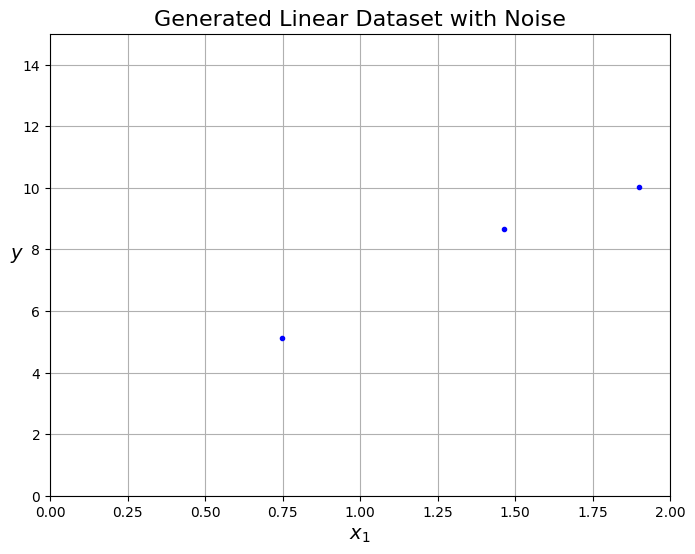

Generating plot for m = 10


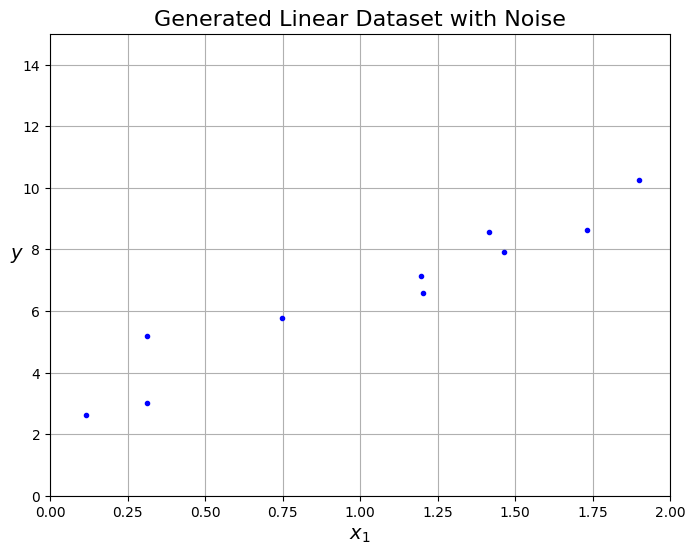

Generating plot for m = 100


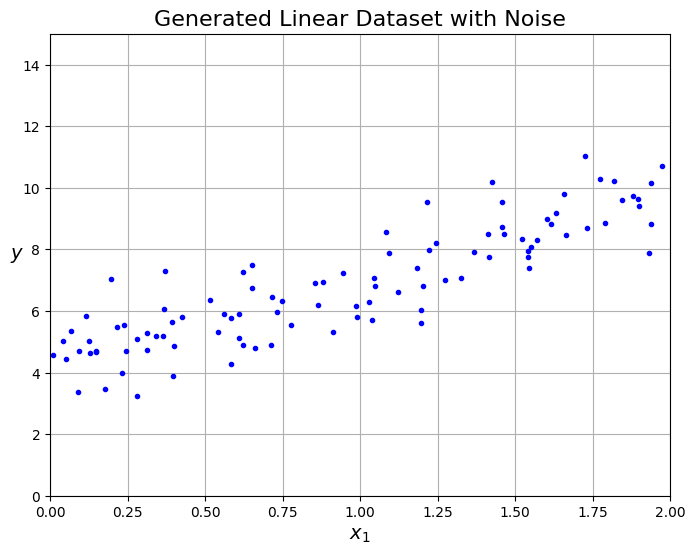

In [8]:
import numpy as np

import matplotlib.pyplot as plt

def generateAndPlotM(mValues):
    for m in mValues:
        print(f"Generating plot for m = {m}")
        np.random.seed(42)  # Ensure reproducibility
        X = 2 * np.random.rand(m, 1)  # Independent variable values
        y = 4 + 3 * X + np.random.randn(m, 1)  # Dependent variable values with noise

        # plotting 
        plt.figure(figsize=(8, 6))
        plt.plot(X, y, "b.")  # Plot data points as blue dots
        plt.xlabel("$x_1$", fontsize=14)
        plt.ylabel("$y$", rotation=0, fontsize=14)
        plt.title("Generated Linear Dataset with Noise", fontsize=16)
        plt.axis([0, 2, 0, 15])
        plt.grid(True)
        plt.show()

mValues =[3, 10, 100]

generateAndPlotM(mValues)

#### PS1.2-2 Bayesian  Regression  (12.5 points)

To solve this problem, you need to review the similar example presented in your AIMA textbook (Section 20.2.6) titled "Bayesian Linear Regression". You can also look at the code [here](https://github.com/pantelis-classes/PRML/blob/master/prml/linear/_bayesian_regression.py). 

Replicate the the Figure 20.7 (a) and (b) shown below. You dont have to replicate the exact examples but you have to generate two figures. The first should show the predictive distribution for the case of small data (sparsity) eg $m=3$ and the second when we have more data eg $m=10$.  Confidence intervals should be shown using the exaxt same standard deviations (1-3 $\sigma$) as in the figure.

![](Fig_20_07.png)

Significant number of points will be subtracted if the code presented is not well documented and if the results are not explained. Use markdown cell and markdown to write a tutorial like treatment of the problem even if this entails copying the equations from the book.

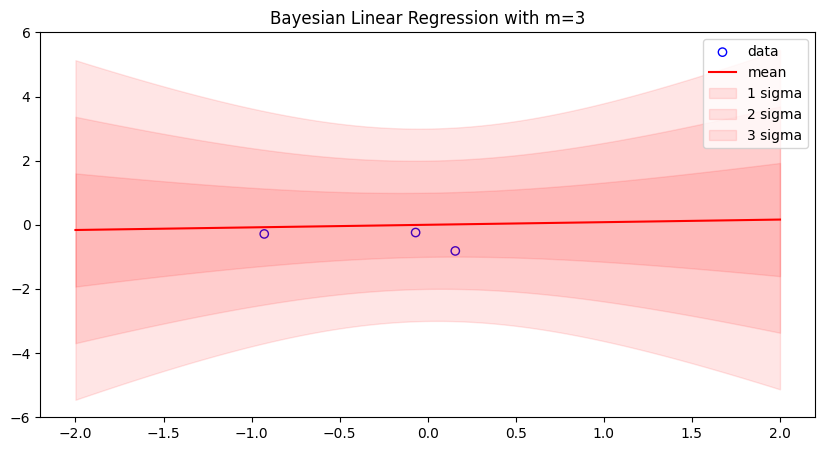

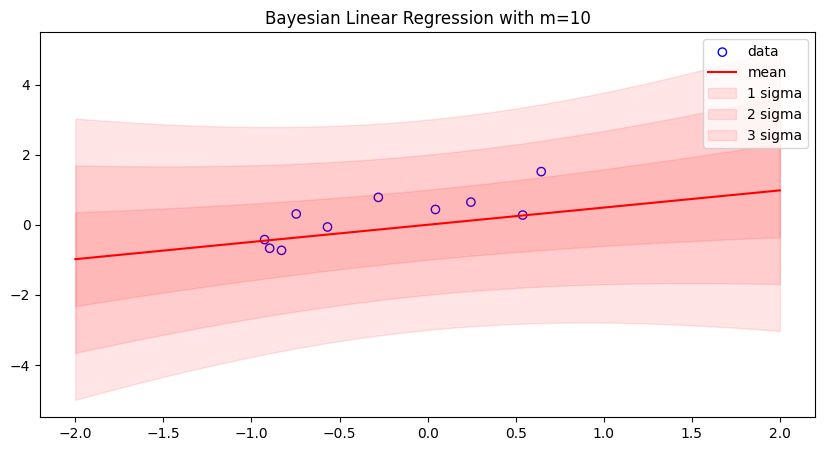

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from prml.linear import BayesianRegression

def generateDataset (m):
    x = np.random.rand(m) * 2 -1
    y = 0.5 * x + np.random.normal(scale = 0.5 , size =m)
    x = x[:,None]
    return x, y


def bayesianLinearRegressionAndPlot(m):
    x_train, y_train = generateDataset(m)
    model = BayesianRegression(alpha =1., beta =1.)
    model.fit(x_train, y_train)
    x_test = np.linspace(-2,2,100)[:,None]
    y, y_std= model.predict(x_test, return_std = True)
    
    plt.figure(figsize=(10, 5))
    plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", label="data")
    plt.plot(x_test, y, color="r", label="mean")    
    
    for i in range(1,4):
        plt.fill_between(x_test.ravel(), y - i * y_std, y + i * y_std, alpha=0.1, color="r", label=f"{i} sigma")
        
    plt.title(f"Bayesian Linear Regression with m={m}")
    plt.legend()
    plt.show()

bayesianLinearRegressionAndPlot(3)
bayesianLinearRegressionAndPlot(10)